In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

ERROR: Operation cancelled by user


In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:


Abort: 

In [ ]:
BATCH_SIZE =32
IMAGE_SIZE = (128,128)

In [ ]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)


Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


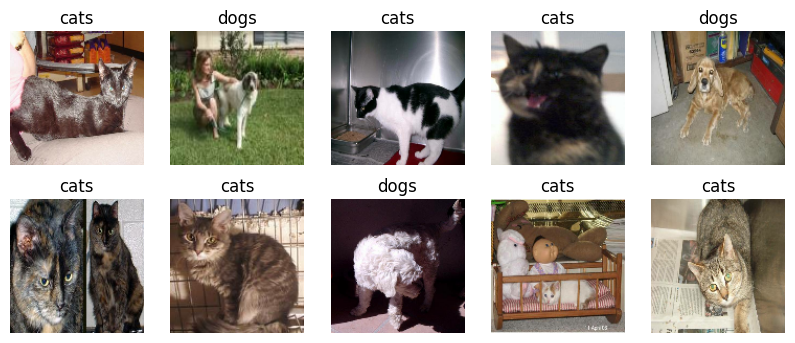

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

In [ ]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 [==============================] - 17s 40ms/step - loss: 0.6602 - accuracy: 0.6062 - val_loss: 0.6684 - val_accuracy: 0.5562
Epoch 2/20
225/225 [==============================] - 11s 47ms/step - loss: 0.6295 - accuracy: 0.6431 - val_loss: 0.6071 - val_accuracy: 0.6587
Epoch 3/20
225/225 [==============================] - 9s 39ms/step - loss: 0.6072 - accuracy: 0.6643 - val_loss: 0.6281 - val_accuracy: 0.6700
Epoch 4/20
225/225 [==============================] - 9s 38ms/step - loss: 0.5976 - accuracy: 0.6779 - val_loss: 0.5761 - val_accuracy: 0.6850
Epoch 5/20
225/225 [==============================] - 10s 43ms/step - loss: 0.5735 - accuracy: 0.6993 - val_loss: 0.5122 - val_accuracy: 0.7362
Epoch 6/20
225/225 [==============================] - 9s 39ms/step - loss: 0.5514 - accuracy: 0.7163 - val_loss: 0.5071 - val_accuracy: 0.7337
Epoch 7/20
225/225 [==============================] - 9s 39ms/step - loss: 0.5435 - accuracy: 0.7268 - val_loss: 0.5146 - val_accuracy: 0.7

In [ ]:
history.history


{'loss': [0.6601829528808594,
  0.6294613480567932,
  0.6072310209274292,
  0.5976281762123108,
  0.5734685659408569,
  0.5513896346092224,
  0.5434536337852478,
  0.5313491225242615,
  0.5243088006973267,
  0.509577751159668,
  0.5074489116668701,
  0.49497517943382263,
  0.48948371410369873,
  0.47990912199020386,
  0.4641419053077698,
  0.45866188406944275,
  0.45717716217041016,
  0.44733279943466187,
  0.4450472891330719,
  0.44000500440597534],
 'accuracy': [0.606249988079071,
  0.6430555582046509,
  0.664305567741394,
  0.6779166460037231,
  0.699305534362793,
  0.7162500023841858,
  0.726805567741394,
  0.7368055582046509,
  0.742638885974884,
  0.7465277910232544,
  0.7481944561004639,
  0.7605555653572083,
  0.7597222328186035,
  0.7705555558204651,
  0.7770833373069763,
  0.7833333611488342,
  0.7801389098167419,
  0.789305567741394,
  0.7934722304344177,
  0.7906944155693054],
 'val_loss': [0.6684027314186096,
  0.6071106791496277,
  0.6280842423439026,
  0.5760658979415894

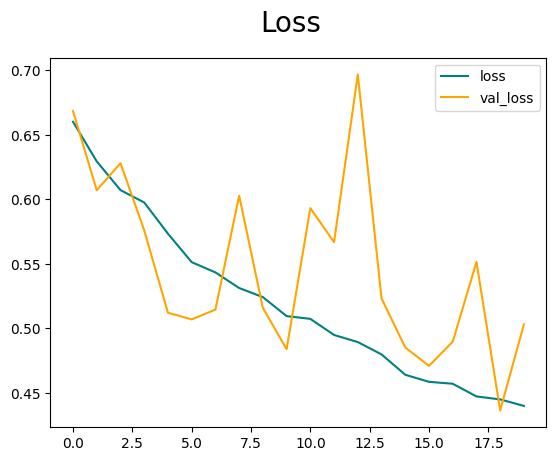

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

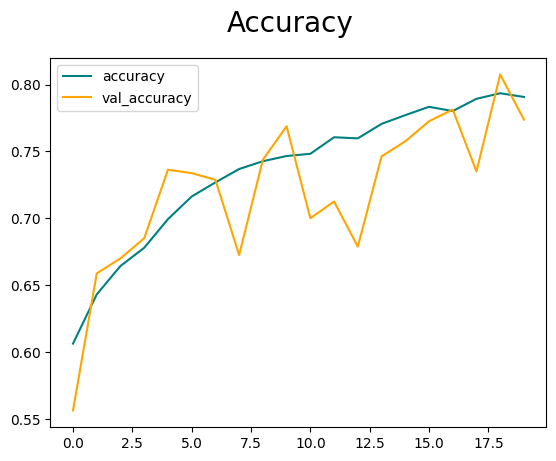

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 352ms/step


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7217742>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.895>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.775>

In [ ]:
!pip install opencv-python -q

In [ ]:
import cv2

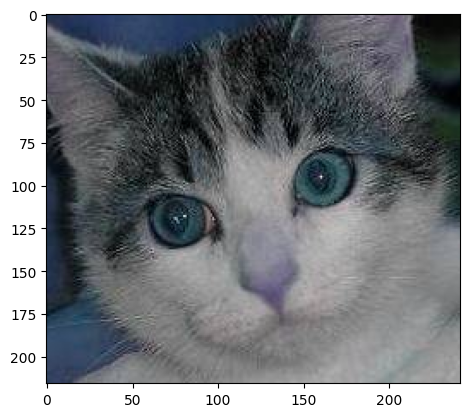

In [ ]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4061.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.13333334, 0.2182598 , 0.32746342],
        [0.13811944, 0.21642826, 0.32758024],
        [0.14739488, 0.21737228, 0.33109778],
        ...,
        [0.03440564, 0.03832721, 0.03048407],
        [0.03529412, 0.03921569, 0.03137255],
        [0.03529412, 0.03921569, 0.03137255]],

       [[0.1515625 , 0.21786152, 0.32156193],
        [0.1403081 , 0.20656595, 0.3120816 ],
        [0.13471201, 0.19827858, 0.30495462],
        ...,
        [0.03440564, 0.03832721, 0.03048407],
        [0.03529412, 0.03921569, 0.03137255],
        [0.03529412, 0.03921569, 0.03137255]],

       [[0.17423406, 0.21222426, 0.30242035],
        [0.15894033, 0.204069  , 0.29445177],
        [0.15336531, 0.19845857, 0.30437633],
        ...,
        [0.03440564, 0.03832721, 0.03048407],
        [0.03529412, 0.03921569, 0.03137255],
        [0.03529412, 0.03921569, 0.03137255]],

       ...,

       [[0.20095071, 0.26761737, 0.37349972],
        [0.19

In [ ]:
scaled_image.shape

TensorShape([128, 128, 3])

In [ ]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [ ]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 18ms/step


In [ ]:
yhat

array([[0.2446682]], dtype=float32)

In [ ]:
class_names

['cats', 'dogs']

In [ ]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

cats
